<a href="https://colab.research.google.com/github/rachitss/Quant_Comp_Lab/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install numpy qiskit[visualization] qiskit_ibm_runtime qiskit_aer notebook jupyterlab ipywidgets matplotlib  seaborn --upgrade

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram

from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.circuit.library import MCXGate
from qiskit import __version__


## 2 QUBITS, w = |11>

In [36]:
n = 2
grover_circuit = QuantumCircuit(n)


In [37]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


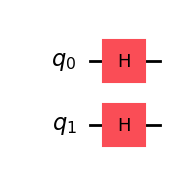

In [38]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')


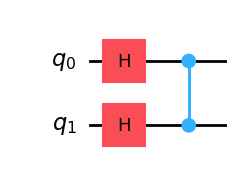

In [39]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw('mpl')


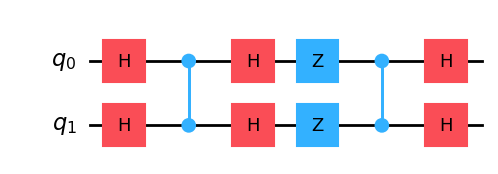

In [40]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')


In [41]:
statevec = Statevector(grover_circuit)
array_to_latex(statevec.data, prefix="|\\psi\\rangle =")


<IPython.core.display.Latex object>

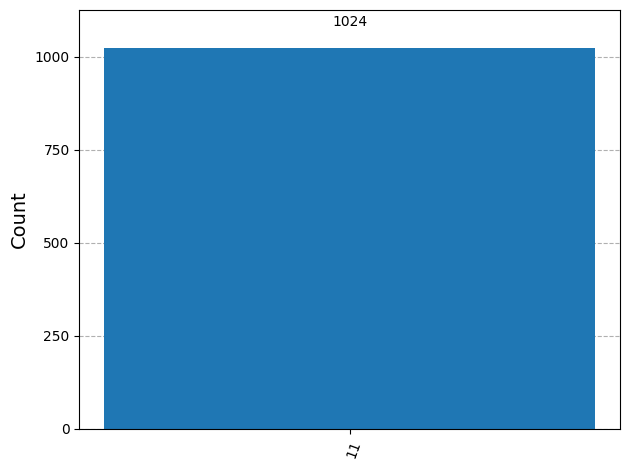

In [42]:
grover_circuit.measure_all()

qasm_sim = AerSimulator()
grover_circuit_t = transpile(grover_circuit, qasm_sim)
result = qasm_sim.run(grover_circuit_t).result()
counts = result.get_counts()
plot_histogram(counts)


## 3 QUBITS, w = |101> and |110>

In [57]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"


In [66]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.append(MCXGate(nqubits - 1), list(range(nqubits)))  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s


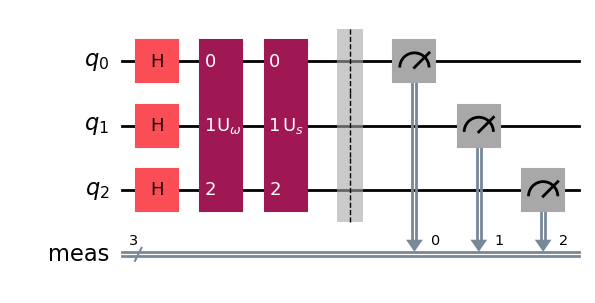

In [71]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

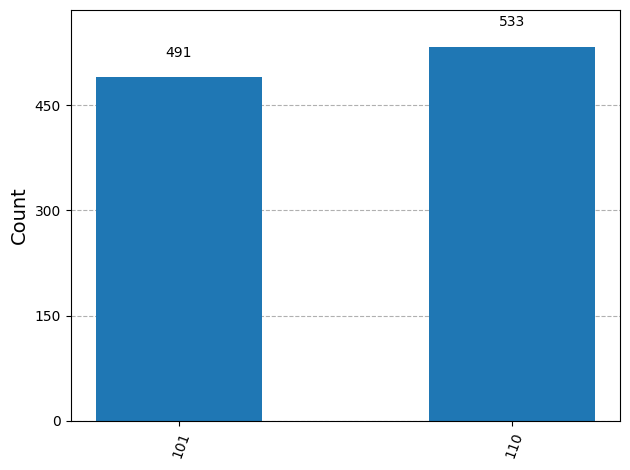

In [72]:
qasm_sim = AerSimulator()
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [81]:
print(__version__)


2.0.0
